Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
832/832 [==============================] - 18s 18ms/step - loss: 0.0016 - val_loss: 3.8473e-04
Epoch 2/20
832/832 [==============================] - 15s 18ms/step - loss: 5.2558e-04 - val_loss: 2.7860e-04
Epoch 3/20
832/832 [==============================] - 15s 18ms/step - loss: 4.9045e-04 - val_loss: 2.7784e-04
Epoch 4/20
832/832 [==============================] - 15

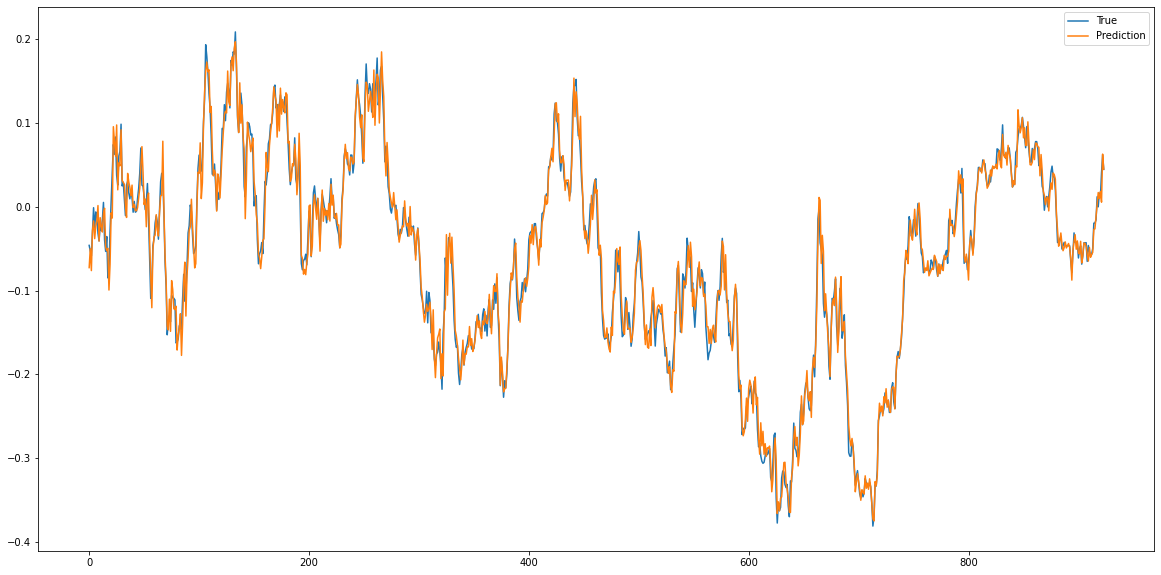

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = pd.read_csv("../dataset/samsung.csv")
data.head()

high_prices = data["고가"].values
low_prices = data["저가"].values
mid_prices = (high_prices + low_prices) / 2

result = [mid_prices[index: index + 51] for index in range(len(mid_prices) - 51)]
normalized_data = [[((float(p) / float(window[0])) - 1) for p in window] for window in result]
result = np.array(normalized_data)

row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

# build model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation="linear"))
model.compile(loss="mse", optimizer="rmsprop")
model.summary()

# training
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20)

pred = model.predict(x_test)

fig = plt.figure(facecolor="white", figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label="True")
ax.plot(pred, label="Prediction")
ax.legend()
plt.show()
